In [1]:
import os
import torch
import train
import model
import utils
import numpy as np
import barlow_twins
from datetime import datetime

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_workers = 1 if torch.cuda.is_available() else 0

In [2]:
TRAIN_DIR = './data/train'
VAL_DIR = './data/val'
TRAIN_SIZE = 10_000
BATCH_SIZE = 256
VAL_SIZE = 1_000
N_EPOCHS = 100
OUTPUT_PATH = './results'

if not os.path.exists(OUTPUT_PATH):
    raise ValueError('output path does not exist')

print('Device:', device)

Device: cpu


In [3]:
train_files = []
for f in os.listdir(TRAIN_DIR):
    file = dict(np.load(os.path.join(TRAIN_DIR, f)))
    train_files.append(file)
train_dataset = utils.segDataset(train_files, TRAIN_SIZE)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers, collate_fn=barlow_twins.collate)

val_files = []
for f in os.listdir(VAL_DIR):
    file = dict(np.load(os.path.join(VAL_DIR, f)))
    val_files.append(file)
val_dataset = utils.segDataset_val(val_files, VAL_SIZE)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers, collate_fn=barlow_twins.collate)

Reading images...
Done!
Reading images...
Done!


In [4]:
import matplotlib.pyplot as plt

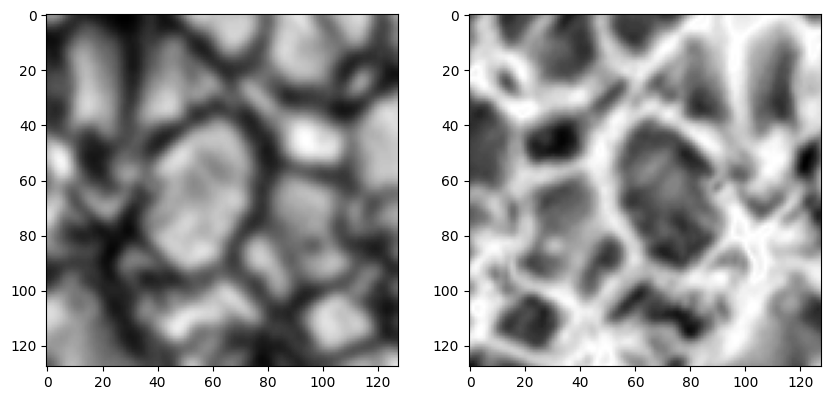

In [28]:
plt.figure(figsize=(10, 5))
for (x1, x2) in val_loader:
    plt.subplot(1, 2, 1)
    plt.imshow(x1[0][0], cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(x2[0][0], cmap='gray')
    break